In [1]:
import pandas as pd
pd.set_option('display.max_columns', None) #See all dataframe columns

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
data = pd.read_csv('pbp_data.csv')

In [4]:
data.shape
data.info()
data.head()

(897589, 35)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 897589 entries, 0 to 897588
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   away_team                   897589 non-null  object 
 1   defteam                     897589 non-null  object 
 2   defteam_timeouts_remaining  897589 non-null  float64
 3   desc                        897589 non-null  object 
 4   down                        812335 non-null  float64
 5   drive                       895536 non-null  float64
 6   ep                          897589 non-null  float64
 7   game_date                   897589 non-null  object 
 8   game_half                   897589 non-null  object 
 9   game_id                     897589 non-null  object 
 10  game_seconds_remaining      897584 non-null  float64
 11  half_seconds_remaining      897584 non-null  float64
 12  home_team                   897589 non-null  object 
 13  play_id       

,away_team,defteam,defteam_timeouts_remaining,desc,down,drive,ep,game_date,game_half,game_id,game_seconds_remaining,half_seconds_remaining,home_team,play_id,play_type,posteam,posteam_timeouts_remaining,qtr,result,score_differential,season,season_type,spread_line,week,wp,yardline_100,ydstogo,Winner,label,receive_2h_ko,home,posteam_spread,elapsed_share,spread_time,Diff_Time_Ratio
0,ARI,ARI,3.0,C.Jacke kicks 68 yards from ARI 30 to PHI 2. A...,NaN,1.0,0.637888,1999-09-12,Half1,1999_01_ARI_PHI,3600.0,1800.0,PHI,35,kickoff,PHI,3.0,1,-1,NaN,1999,REG,-3.0,1,0.000294,30.0,0,ARI,0,0,1,-3.0,0.0,-3.0,NaN
1,ARI,ARI,3.0,(15:00) D.Pederson pass incomplete to D.Staley...,1.0,1.0,0.764706,1999-09-12,Half1,1999_01_ARI_PHI,3600.0,1800.0,PHI,60,pass,PHI,3.0,1,-1,0.0,1999,REG,-3.0,1,0.546969,77.0,10,ARI,0,0,1,-3.0,0.0,-3.0,0.0
2,ARI,ARI,3.0,(15:00) D.Staley up the middle to PHI 24 for 1...,2.0,1.0,0.203138,1999-09-12,Half1,1999_01_ARI_PHI,3600.0,1800.0,PHI,82,run,PHI,3.0,1,-1,0.0,1999,REG,-3.0,1,0.528741,77.0,10,ARI,0,0,1,-3.0,0.0,-3.0,0.0
3,ARI,ARI,3.0,"(15:00) PENALTY on PHI-K.Turner, False Start, ...",3.0,1.0,-0.438578,1999-09-12,Half1,1999_01_ARI_PHI,3600.0,1800.0,PHI,103,no_play,PHI,3.0,1,-1,0.0,1999,REG,-3.0,1,0.498319,76.0,9,ARI,0,0,1,-3.0,0.0,-3.0,0.0
4,ARI,ARI,3.0,(15:00) D.Pederson pass to B.Finneran to PHI 2...,3.0,1.0,-1.161881,1999-09-12,Half1,1999_01_ARI_PHI,3600.0,1800.0,PHI,126,pass,PHI,3.0,1,-1,0.0,1999,REG,-3.0,1,0.490872,81.0,14,ARI,0,0,1,-3.0,0.0,-3.0,0.0


In [5]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Preliminary Model

In [6]:
prelim_predictors = ['down','ydstogo','yardline_100','game_seconds_remaining','score_differential']
X = data[prelim_predictors]
y = data['label']

In [7]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
# fit model to training data
model = XGBClassifier()
model.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:15:06] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [9]:
# make predictions for test data
y_pred = model.predict(X_test)

In [10]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.46%


In [11]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

In [12]:
print(model.feature_importances_)

[0.02663926 0.00617485 0.02040401 0.03194536 0.9148365 ]


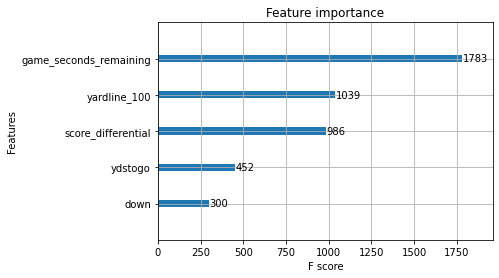

In [13]:
plot_importance(model)
plt.show();

# Advanced Model

In [14]:
predictors = ['down','ydstogo','yardline_100','game_seconds_remaining','score_differential',
              'receive_2h_ko','home','half_seconds_remaining','Diff_Time_Ratio',
              'posteam_timeouts_remaining','defteam_timeouts_remaining','season']
X = data[predictors]
y = data['label']

In [15]:
# split data into train and test sets
seed = 7
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [16]:
# fit model to training data
model = XGBClassifier(booster='gbtree',
                      objective='binary:logistic',
                      eval_metric='logloss',
                      learning_rate=0.2,
                      gamma=0,
                      subsample=0.8,
                      colsample_bytree=0.8,
                      max_depth=4,
                      min_child_weight=1)
model.fit(X_train, y_train)

/usr/local/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.8, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [17]:
# make predictions for test data
y_pred = model.predict(X_test)

In [18]:
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.03%


In [19]:
y_proba = pd.DataFrame(model.predict_proba(X),columns=['Loss','Win'])
data['y_proba'] = y_proba['Win']

In [20]:
import sklearn.metrics as metrics
import numpy as np  # for root mean-squared error calculation

print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(data['wp'], data['y_proba'])),3))

Root Mean Squared Error: 0.033


In [21]:
print(model.feature_importances_)

[0.02216692 0.00842879 0.02638249 0.01295925 0.6343415  0.03186044
 0.05031746 0.00263064 0.1898526  0.00579348 0.00547117 0.00979538]


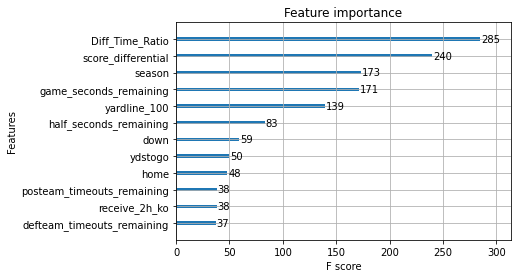

In [22]:
plot_importance(model)
plt.show();

In [23]:
data['home_proba'] = np.where(data['posteam'] == data['home_team'], data['y_proba'], 1 - data['y_proba'])
data['away_proba'] = np.where(data['posteam'] == data['away_team'], data['y_proba'], 1 - data['y_proba'])

data['home_wp'] = np.where(data['posteam'] == data['home_team'], data['wp'], 1 - data['wp'])
data['away_wp'] = np.where(data['posteam'] == data['away_team'], data['wp'], 1 - data['wp'])

In [24]:
bal_buf = data[data['game_id'] == '2020_19_BAL_BUF']

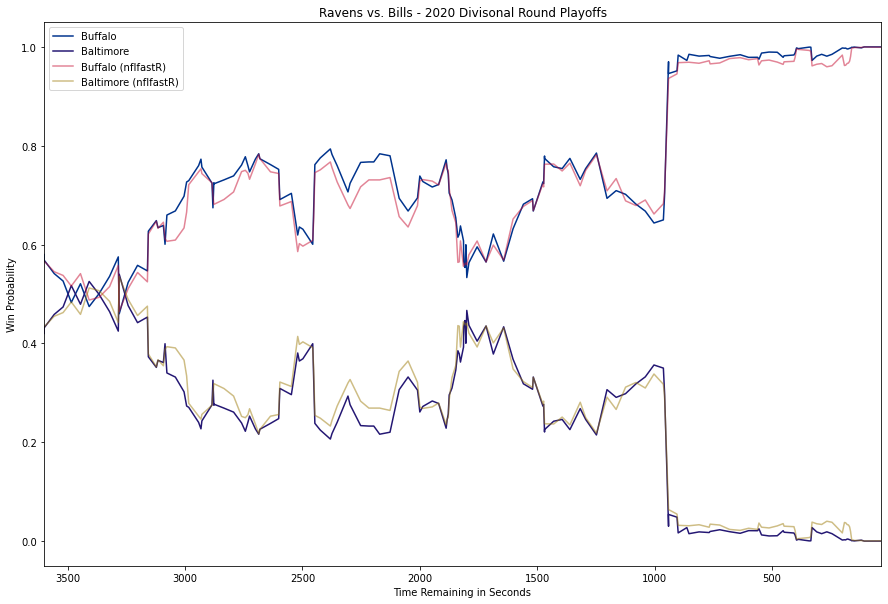

In [25]:
plt.figure(figsize=(15, 10))

# Home Team
x1 = bal_buf['game_seconds_remaining']
y1 = bal_buf['home_proba']
plt.plot(x1, y1, color = '#00338D', label = "Buffalo")

# Away Team
x2 = bal_buf['game_seconds_remaining']
y2 = bal_buf['away_proba']
plt.plot(x2, y2, color = '#241773', label = "Baltimore")

# Home Team - nflfastR
x3 = bal_buf['game_seconds_remaining']
y3 = bal_buf['home_wp']
plt.plot(x3, y3, color = '#C60C30', alpha = 0.5, label = "Buffalo (nflfastR)")

# Away Team - nflfastR
x4 = bal_buf['game_seconds_remaining']
y4 = bal_buf['away_wp']
plt.plot(x4, y4, color = '#9E7C0C', alpha = 0.5, label = "Baltimore (nflfastR)")

plt.xlabel('Time Remaining in Seconds')
plt.ylabel('Win Probability')
plt.title('Ravens vs. Bills - 2020 Divisonal Round Playoffs')
plt.xlim(max(x1), min(x1))
plt.legend()
plt.show();

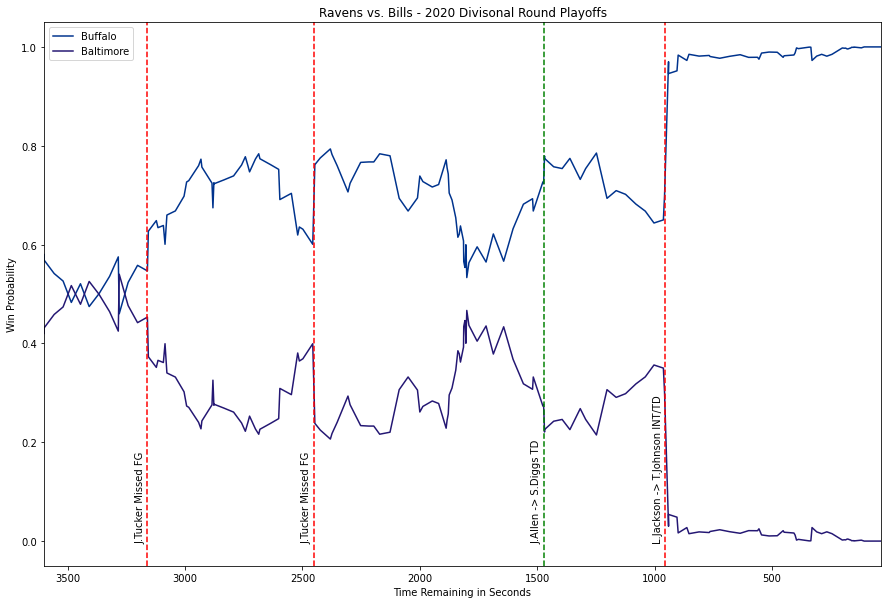

In [27]:
plt.figure(figsize=(15, 10))

# Home Team
x1 = bal_buf['game_seconds_remaining']
y1 = bal_buf['home_proba']
plt.plot(x1, y1, color = '#00338D', label = "Buffalo")

# Away Team
x2 = bal_buf['game_seconds_remaining']
y2 = bal_buf['away_proba']
plt.plot(x2, y2, color = '#241773', label = "Baltimore")

plt.xlabel('Time Remaining in Seconds')
plt.ylabel('Win Probability')
plt.title('Ravens vs. Bills - 2020 Divisonal Round Playoffs')
plt.xlim(max(x1), min(x1))

plt.axvline(3160, 0, 1, color='red', linestyle='--')
plt.text(3210, 0, 'J.Tucker Missed FG', rotation=90)
plt.axvline(2452, 0, 1, color='red', linestyle='--')
plt.text(2502, 0, 'J.Tucker Missed FG', rotation=90)
plt.axvline(1473, 0, 1, color='green', linestyle='--')
plt.text(1523, 0, 'J.Allen -> S.Diggs TD', rotation=90)
plt.axvline(958, 0, 1, color='red', linestyle='--')
plt.text(1008, 0, 'L.Jackson -> T.Johnson INT/TD', rotation=90)

plt.legend()
plt.show();